## Customer Purchase Predictor

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
cols = ["event_time", "product_id", "category_code", "price", "user_id", "event_type"]
dtypes = {"product_id":"int64", "category_code":"category", "event_type":"category", "user_id":"Int64", "price":"float64"}

In [4]:
#customer_nov_data =  pl.read_csv("../data/raw/2019-Nov.csv", columns=cols)

In [5]:
#activity_data = customer_nov_data.filter(pl.col('event_type').is_in(["cart", "purchase"]))
#activity_data.write_parquet("../data/raw/2019_Nov.parquet")


In [6]:
#customer_oct_data =  pl.read_csv("../data/raw/2019-Oct.csv", columns=cols)

In [7]:
#activity_data = customer_nov_data.filter(pl.col('event_type').is_in(["cart", "purchase"]))
#activity_data.write_parquet("../data/raw/2019_Oct.parquet")

In [ ]:
customer_oct_data = pd.read_parquet("../data/raw/2019_ Oct.parquet")

In [9]:
customer_oct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945869 entries, 0 to 3945868
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_code  object 
 4   price          float64
 5   user_id        int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 180.6+ MB


In [10]:
customer_oct_data.head(5)

,event_time,event_type,product_id,category_code,price,user_id
0,2019-11-01 00:00:14 UTC,cart,1005014,electronics.smartphone,503.09,533326659
1,2019-11-01 00:00:41 UTC,purchase,13200605,furniture.bedroom.bed,566.30,559368633
2,2019-11-01 00:01:04 UTC,purchase,1005161,electronics.smartphone,211.92,513351129
3,2019-11-01 00:03:24 UTC,cart,1801881,electronics.video.tv,488.80,557746614
4,2019-11-01 00:03:39 UTC,cart,1005115,electronics.smartphone,949.47,565865924


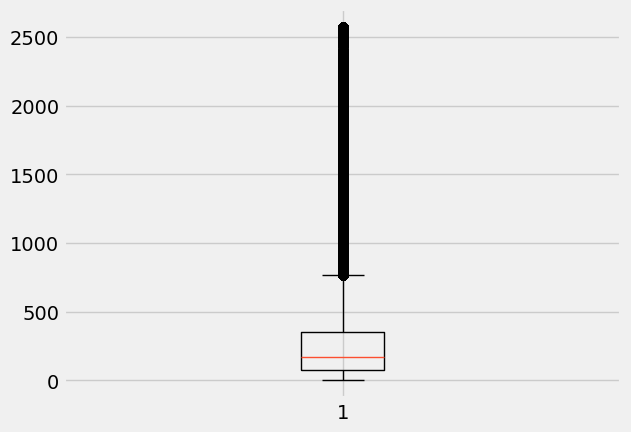

In [11]:
plt.boxplot(customer_oct_data["price"] )
plt.show()

In [12]:
outliers = customer_oct_data[customer_oct_data["price"] > 900]
print(outliers.shape)

(347185, 6)


In [13]:
customer_oct_data["category_code"].value_counts()[-20:]

category_code
country_yard.cultivator          180
apparel.belt                     171
apparel.shoes.moccasins          141
apparel.sock                     120
auto.accessories.anti_freeze     114
appliances.environment.fan       113
accessories.umbrella              99
apparel.glove                     87
apparel.shoes.ballet_shoes        80
auto.accessories.winch            76
apparel.skirt                     71
apparel.shoes.slipons             61
apparel.scarf                     51
construction.tools.soldering      45
apparel.shoes.step_ins            26
country_yard.furniture.hammok     22
apparel.shorts                    13
appliances.kitchen.fryer           9
apparel.shoes.espadrilles          8
construction.tools.screw           2
Name: count, dtype: int64

In [14]:
customer_oct_data["category"] = customer_oct_data["category_code"].str.split(".").str[0]

In [15]:
customer_oct_data["event_type"].value_counts()

event_type
cart        3028930
purchase     916939
Name: count, dtype: int64

In [16]:
customer_oct_data["event_time"] = pd.to_datetime(customer_oct_data["event_time"])

In [17]:
print(f"min_date: {customer_oct_data['event_time'].min()} \nmax_date: {customer_oct_data['event_time'].max()}")

min_date: 2019-11-01 00:00:14+00:00 
max_date: 2019-11-30 23:59:52+00:00


In [18]:
customer_oct_data["month"] = customer_oct_data["event_time"].dt.month
customer_oct_data["weekday"] = customer_oct_data["event_time"].dt.day_name()
customer_oct_data["hour_24"] = customer_oct_data["event_time"].dt.hour
customer_oct_data["hour_12"] = customer_oct_data["event_time"].dt.strftime("%I %p")

In [19]:
customer_oct_data.head(5)

,event_time,event_type,product_id,category_code,price,user_id,category,month,weekday,hour_24,hour_12
0,2019-11-01 00:00:14+00:00,cart,1005014,electronics.smartphone,503.09,533326659,electronics,11,Friday,0,12 AM
1,2019-11-01 00:00:41+00:00,purchase,13200605,furniture.bedroom.bed,566.30,559368633,furniture,11,Friday,0,12 AM
2,2019-11-01 00:01:04+00:00,purchase,1005161,electronics.smartphone,211.92,513351129,electronics,11,Friday,0,12 AM
3,2019-11-01 00:03:24+00:00,cart,1801881,electronics.video.tv,488.80,557746614,electronics,11,Friday,0,12 AM
4,2019-11-01 00:03:39+00:00,cart,1005115,electronics.smartphone,949.47,565865924,electronics,11,Friday,0,12 AM


In [20]:
customer_oct_data = customer_oct_data.sort_values(by=["event_time"])

In [21]:
customer_oct_data["prev_event_time"] = customer_oct_data["event_time"].shift(1)

In [22]:
customer_oct_data.head(5)

,event_time,event_type,product_id,category_code,price,user_id,category,month,weekday,hour_24,hour_12,prev_event_time
0,2019-11-01 00:00:14+00:00,cart,1005014,electronics.smartphone,503.09,533326659,electronics,11,Friday,0,12 AM,NaT
1,2019-11-01 00:00:41+00:00,purchase,13200605,furniture.bedroom.bed,566.30,559368633,furniture,11,Friday,0,12 AM,2019-11-01 00:00:14+00:00
2,2019-11-01 00:01:04+00:00,purchase,1005161,electronics.smartphone,211.92,513351129,electronics,11,Friday,0,12 AM,2019-11-01 00:00:41+00:00
3,2019-11-01 00:03:24+00:00,cart,1801881,electronics.video.tv,488.80,557746614,electronics,11,Friday,0,12 AM,2019-11-01 00:01:04+00:00
4,2019-11-01 00:03:39+00:00,cart,1005115,electronics.smartphone,949.47,565865924,electronics,11,Friday,0,12 AM,2019-11-01 00:03:24+00:00


In [23]:
customer_oct_data["hours_since_last_event"] = (customer_oct_data["event_time"] - customer_oct_data["prev_event_time"]).dt.total_seconds() / 3600

In [24]:
customer_oct_data.head(5)

,event_time,event_type,product_id,category_code,price,user_id,category,month,weekday,hour_24,hour_12,prev_event_time,hours_since_last_event
0,2019-11-01 00:00:14+00:00,cart,1005014,electronics.smartphone,503.09,533326659,electronics,11,Friday,0,12 AM,NaT,NaN
1,2019-11-01 00:00:41+00:00,purchase,13200605,furniture.bedroom.bed,566.30,559368633,furniture,11,Friday,0,12 AM,2019-11-01 00:00:14+00:00,0.007500
2,2019-11-01 00:01:04+00:00,purchase,1005161,electronics.smartphone,211.92,513351129,electronics,11,Friday,0,12 AM,2019-11-01 00:00:41+00:00,0.006389
3,2019-11-01 00:03:24+00:00,cart,1801881,electronics.video.tv,488.80,557746614,electronics,11,Friday,0,12 AM,2019-11-01 00:01:04+00:00,0.038889
4,2019-11-01 00:03:39+00:00,cart,1005115,electronics.smartphone,949.47,565865924,electronics,11,Friday,0,12 AM,2019-11-01 00:03:24+00:00,0.004167


In [25]:
customer_oct_data["hour_12"].value_counts()

hour_12
09 AM    258732
10 AM    257118
08 AM    255255
11 AM    247929
07 AM    246716
06 AM    241287
02 PM    231528
12 PM    230731
05 AM    230075
01 PM    227366
03 PM    225737
04 PM    212200
04 AM    200573
05 PM    196974
06 PM    155874
03 AM    144841
07 PM    103950
02 AM     81321
08 PM     64575
01 AM     38698
09 PM     37724
10 PM     22416
12 AM     19300
11 PM     14949
Name: count, dtype: int64

In [26]:
customer_oct_data["event_type"].value_counts()

event_type
cart        3028930
purchase     916939
Name: count, dtype: int64

In [27]:
purchase_data = customer_oct_data[customer_oct_data["event_type"] == "purchase"]
cart_data = customer_oct_data[customer_oct_data["event_type"] == "cart"]

In [28]:
purchase_data["hour_12"].value_counts()

hour_12
09 AM    71434
10 AM    69042
08 AM    65261
11 AM    64271
12 PM    61257
01 PM    59671
02 PM    59474
07 AM    58705
06 AM    57427
05 AM    53361
03 PM    52599
04 PM    46220
05 PM    45342
04 AM    44089
03 AM    26336
06 PM    23642
07 PM    17063
02 AM    11156
08 PM    10153
09 PM     6319
10 PM     4289
01 AM     4215
12 AM     2822
11 PM     2791
Name: count, dtype: int64

In [29]:
cart_data["hour_12"].value_counts()

hour_12
08 AM    189994
10 AM    188076
07 AM    188011
09 AM    187298
06 AM    183860
11 AM    183658
05 AM    176714
03 PM    173138
02 PM    172054
12 PM    169474
01 PM    167695
04 PM    165980
04 AM    156484
05 PM    151632
06 PM    132232
03 AM    118505
07 PM     86887
02 AM     70165
08 PM     54422
01 AM     34483
09 PM     31405
10 PM     18127
12 AM     16478
11 PM     12158
Name: count, dtype: int64

In [30]:
customer_oct_data["is_peak_hours"] = customer_oct_data["hour_24"].between(6, 11).astype(int)
customer_oct_data["is_purchase"] = (customer_oct_data["event_type"] == "purchase").astype(int)

In [31]:
peak_hours = customer_oct_data[customer_oct_data["is_peak_hours"] == 1]
off_peak_hours = customer_oct_data[customer_oct_data["is_peak_hours"] == 0]

In [32]:
peak_rate = peak_hours["is_purchase"].mean()
off_peak_rate = off_peak_hours["is_purchase"].mean()
print(f"peak rate: {peak_rate * 100:.2f}% \
      \noff_peak_rate: {off_peak_rate * 100:.2f}%")

peak rate: 25.62%       
off_peak_rate: 21.76%


In [33]:
percent_diff = (peak_rate - off_peak_rate) / off_peak_rate
print(f"Percent difference : {percent_diff * 100:.2f}%")

Percent difference : 17.73%


In [34]:
top_spenders = customer_oct_data[customer_oct_data["price"] > 900]

In [35]:
top_spenders = top_spenders[top_spenders["event_type"] == "purchase"]

In [36]:
top_spenders["hour_12"].value_counts()

hour_12
09 AM    6784
10 AM    6693
11 AM    6252
08 AM    6063
12 PM    5764
01 PM    5419
02 PM    5228
07 AM    5087
06 AM    4992
05 AM    4655
03 PM    4510
05 PM    3938
04 PM    3859
04 AM    3674
06 PM    2566
03 AM    2108
07 PM    1762
08 PM    1239
09 PM     864
02 AM     842
10 PM     593
11 PM     378
01 AM     364
12 AM     310
Name: count, dtype: int64

In [37]:
def map_time_of_day(hour):
    if 5 <= hour <= 11:
        return "morning"
    elif 12 <= hour <= 16:
        return "afternoon"
    elif 17 <= hour <= 20:
        return "evening"
    else:
        return "night"

In [38]:
customer_oct_data["time_of_day"] = customer_oct_data["hour_24"].apply(map_time_of_day)

In [39]:
customer_oct_data["time_of_day"].value_counts()

time_of_day
morning      1737112
afternoon    1127562
night         559822
evening       521373
Name: count, dtype: int64

In [40]:
peak_time_of_day = customer_oct_data.groupby(by=["time_of_day"])["is_purchase"].mean().sort_values(ascending=False)
print(peak_time_of_day)

time_of_day
morning      0.253007
afternoon    0.247633
evening      0.184513
night        0.182231
Name: is_purchase, dtype: float64


In [41]:
def segment_user(num_purchases):
    if num_purchases == 0:
        return "window_shopper"
    elif num_purchases == 1:
        return "new_buyer"
    elif 2 <= num_purchases <= 5:
        return "repeat_buyer"
    else:
        return "loyal_buyer"

In [42]:
purchase_counts = customer_oct_data[customer_oct_data["is_purchase"] == 1]["user_id"].value_counts()
customer_oct_data["user_purchase_count"] = customer_oct_data["user_id"].map(purchase_counts).fillna(0)
customer_oct_data["buyer_segment"] = customer_oct_data["user_purchase_count"].apply(segment_user)

In [43]:
customer_oct_data["buyer_segment"].value_counts()

buyer_segment
repeat_buyer      1187578
window_shopper    1085244
new_buyer          995592
loyal_buyer        677455
Name: count, dtype: int64

In [44]:
print(customer_oct_data.columns)

Index(['event_time', 'event_type', 'product_id', 'category_code', 'price',
       'user_id', 'category', 'month', 'weekday', 'hour_24', 'hour_12',
       'prev_event_time', 'hours_since_last_event', 'is_peak_hours',
       'is_purchase', 'time_of_day', 'user_purchase_count', 'buyer_segment'],
      dtype='object')


In [45]:
customer_oct_data["time_between_events"] = customer_oct_data.sort_values(by=["user_id", "event_time"]).groupby(by=["user_id"])["event_time"].diff().dt.total_seconds()

In [46]:
clumpiness = (customer_oct_data.groupby(by=["user_id"])["time_between_events"].std().fillna(0).rename("clumpiness"))

In [47]:
customer_oct_data = customer_oct_data.merge(clumpiness, on=["user_id"], how="left")

In [48]:
customer_oct_data.head(5)

,event_time,event_type,product_id,category_code,price,user_id,category,month,weekday,hour_24,hour_12,prev_event_time,hours_since_last_event,is_peak_hours,is_purchase,time_of_day,user_purchase_count,buyer_segment,time_between_events,clumpiness
0,2019-11-01 00:00:14+00:00,cart,1005014,electronics.smartphone,503.09,533326659,electronics,11,Friday,0,12 AM,NaT,NaN,0,0,night,2.0,repeat_buyer,NaN,3.582655e+05
1,2019-11-01 00:00:41+00:00,purchase,13200605,furniture.bedroom.bed,566.30,559368633,furniture,11,Friday,0,12 AM,2019-11-01 00:00:14+00:00,0.007500,0,1,night,1.0,new_buyer,NaN,0.000000e+00
2,2019-11-01 00:01:04+00:00,purchase,1005161,electronics.smartphone,211.92,513351129,electronics,11,Friday,0,12 AM,2019-11-01 00:00:41+00:00,0.006389,0,1,night,2.0,repeat_buyer,NaN,1.037375e+06
3,2019-11-01 00:03:24+00:00,cart,1801881,electronics.video.tv,488.80,557746614,electronics,11,Friday,0,12 AM,2019-11-01 00:01:04+00:00,0.038889,0,0,night,7.0,loyal_buyer,NaN,5.063570e+01
4,2019-11-01 00:03:39+00:00,cart,1005115,electronics.smartphone,949.47,565865924,electronics,11,Friday,0,12 AM,2019-11-01 00:03:24+00:00,0.004167,0,0,night,4.0,repeat_buyer,NaN,3.443626e+04


In [49]:
user_event_counts = customer_oct_data.groupby(by=["user_id"])["event_type"].count().rename("event_counts").fillna(0).reset_index()
customer_oct_data = customer_oct_data.merge(user_event_counts, on=["user_id"], how="left")


In [50]:
user_stats = customer_oct_data.groupby(by=["user_id"])["is_purchase"].agg(["count", "sum"])
user_stats["purchase_rate"] = user_stats["sum"] / user_stats["count"]
customer_oct_data = customer_oct_data.merge(user_stats["purchase_rate"], on=["user_id"], how="left")

In [51]:
customer_oct_data.head(5)

,event_time,event_type,product_id,category_code,price,user_id,category,month,weekday,hour_24,...,hours_since_last_event,is_peak_hours,is_purchase,time_of_day,user_purchase_count,buyer_segment,time_between_events,clumpiness,event_counts,purchase_rate
0,2019-11-01 00:00:14+00:00,cart,1005014,electronics.smartphone,503.09,533326659,electronics,11,Friday,0,...,NaN,0,0,night,2.0,repeat_buyer,NaN,3.582655e+05,7,0.285714
1,2019-11-01 00:00:41+00:00,purchase,13200605,furniture.bedroom.bed,566.30,559368633,furniture,11,Friday,0,...,0.007500,0,1,night,1.0,new_buyer,NaN,0.000000e+00,1,1.000000
2,2019-11-01 00:01:04+00:00,purchase,1005161,electronics.smartphone,211.92,513351129,electronics,11,Friday,0,...,0.006389,0,1,night,2.0,repeat_buyer,NaN,1.037375e+06,5,0.400000
3,2019-11-01 00:03:24+00:00,cart,1801881,electronics.video.tv,488.80,557746614,electronics,11,Friday,0,...,0.038889,0,0,night,7.0,loyal_buyer,NaN,5.063570e+01,14,0.500000
4,2019-11-01 00:03:39+00:00,cart,1005115,electronics.smartphone,949.47,565865924,electronics,11,Friday,0,...,0.004167,0,0,night,4.0,repeat_buyer,NaN,3.443626e+04,17,0.235294


In [52]:
customer_oct_data["avg_clumpiness_purchase"] = (customer_oct_data["clumpiness"] * customer_oct_data["user_purchase_count"]) /customer_oct_data["event_counts"] 

In [53]:
customer_oct_data.columns

Index(['event_time', 'event_type', 'product_id', 'category_code', 'price',
       'user_id', 'category', 'month', 'weekday', 'hour_24', 'hour_12',
       'prev_event_time', 'hours_since_last_event', 'is_peak_hours',
       'is_purchase', 'time_of_day', 'user_purchase_count', 'buyer_segment',
       'time_between_events', 'clumpiness', 'event_counts', 'purchase_rate',
       'avg_clumpiness_purchase'],
      dtype='object')

In [54]:
average_time_purchase = customer_oct_data[customer_oct_data["is_purchase"] == 1].groupby(by=["user_id"])["hour_24"].mean().rename("avg_purchase_time")
customer_oct_data = customer_oct_data.merge(average_time_purchase, on=["user_id"], how="left")

In [55]:
clean_oct_data = customer_oct_data[["event_time", "event_type", "user_id", "user_purchase_count", "buyer_segment", "clumpiness", 
                                "month", "weekday", "hour_24", "hour_12", "prev_event_time", "hours_since_last_event", "purchase_rate",
                                "time_between_events", "avg_clumpiness_purchase" ,"event_counts","avg_purchase_time" ,
                                "product_id", "category", "price", "is_purchase"]]

In [56]:
clean_oct_data.head(5)

,event_time,event_type,user_id,user_purchase_count,buyer_segment,clumpiness,month,weekday,hour_24,hour_12,...,hours_since_last_event,purchase_rate,time_between_events,avg_clumpiness_purchase,event_counts,avg_purchase_time,product_id,category,price,is_purchase
0,2019-11-01 00:00:14+00:00,cart,533326659,2.0,repeat_buyer,3.582655e+05,11,Friday,0,12 AM,...,NaN,0.285714,NaN,102361.576207,7,21.00,1005014,electronics,503.09,0
1,2019-11-01 00:00:41+00:00,purchase,559368633,1.0,new_buyer,0.000000e+00,11,Friday,0,12 AM,...,0.007500,1.000000,NaN,0.000000,1,0.00,13200605,furniture,566.30,1
2,2019-11-01 00:01:04+00:00,purchase,513351129,2.0,repeat_buyer,1.037375e+06,11,Friday,0,12 AM,...,0.006389,0.400000,NaN,414950.060551,5,4.50,1005161,electronics,211.92,1
3,2019-11-01 00:03:24+00:00,cart,557746614,7.0,loyal_buyer,5.063570e+01,11,Friday,0,12 AM,...,0.038889,0.500000,NaN,25.317851,14,0.00,1801881,electronics,488.80,0
4,2019-11-01 00:03:39+00:00,cart,565865924,4.0,repeat_buyer,3.443626e+04,11,Friday,0,12 AM,...,0.004167,0.235294,NaN,8102.649490,17,15.75,1005115,electronics,949.47,0


In [ ]:
clean_oct_data.to_parquet("../data/processed/2019_Oct_clean.parquet")